# Irisデータで多値ロジスティック回帰を行う
目的：　多値ロジスティック回帰でIrisデータを識別．
        使用する特徴は二つに限定．

- Pandasでデータの先頭5行を表示
- 精度
- コンフュージョンマトリックス(arrayと図)
- 識別結果の図（ヒートマップ，サンプル点）

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

## データ読込

In [2]:
# データ読込
data = pd.read_csv(「ご自身がiris.csv を置いたパスを書いてください。」, encoding="utf-8")
data.loc[:4]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# 特徴データとラベルをX, yに格納
Features = ['PetalLength', 'PetalWidth']
encoder = LabelEncoder()
X = data[ Features ].values # numpy array
encoder.fit(data.Name) # 整数値のラベルに変換
# encoder.classes_ は ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
y_set = encoder.transform(encoder.classes_) 
y = encoder.transform(data.Name)

In [ ]:
#Xとyの中身を実際に確認してみましょう。

## ロジスティック回帰の学習と，精度・コンフュージョンマトリクス表示

In [8]:
# 多値ロジスティック回帰( C: 正則化係数 )
clf = LogisticRegression(solver='liblinear', C=1e+2, multi_class='auto')
「訓練データ X yを用いてclfの学習を行うコードを書いてください」

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#コンフュージョンマトリクスを出力する関数
def conf_matrix(X,y,clf):
    y_pred = clf.predict(X) 
    acc = 「accuracy_score関数で精度を計算してください」
    cm = 「confusion_matrix関数でコンフュージョンマトリクスを計算してください」
    return acc, cm

In [13]:
#関数の動作確認
print(conf_matrix(X,y,clf)[0])
print(conf_matrix(X,y,clf)[1])

0.96
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


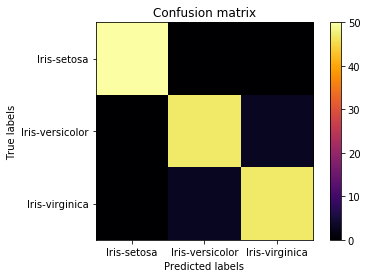

In [14]:
#おまけ：コンフュージョンマトリクスをヒートマップで描画

# xticks, yticksで目盛りのどの位置に何を表示するか指定
plt.xticks( [0,1,2], encoder.inverse_transform(y_set) )
plt.yticks( [0,1,2], encoder.inverse_transform(y_set) )
plt.title('Confusion matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
# 図を表示

plt.imshow(conf_matrix(X,y,clf)[1],  cmap=plt.cm.inferno)
# カラーバーを表示
plt.colorbar()

## 識別面を描画 

In [ ]:
def shikibetsumen(n, X):
    # 0から10の線分をn分割点
    xmin_0, xmax_0 = X[:,0].min(), X[:,0].max()
    xmin_1, xmax_1 = X[:,1].min(), X[:,1].max()
    x0_ = np.linspace(xmin_0, xmax_0, n)
    x1_ = np.linspace(xmin_1, xmax_1, n)
    # grid
    x0, x1 = np.meshgrid(x0_,x1_) # n×nの行列ができる。
    Xgrid = np.column_stack( [x0.ravel(), x1.ravel()] ) #numpy.ravel()で1次元化
    z=0
    「Xgridを入力としてモデルclfで分類を予測した結果をzに代入する処理を書いてください。」
    z = z.reshape(x0.shape) # プロットのためにn×nの形に直す

    
    
    「Xを入力としてモデルclfで分類を予測した結果をy_predに代入する処理を書いてください。」
    # FIgureのサイズを指定 (横幅，縦幅)
    plt.figure( figsize=(5,5) )

    # x, y軸それぞれの目盛りの最小・最大値を設定
    plt.xlim(xmin_0, xmax_0)
    plt.ylim(xmin_1, xmax_1)

    # グラフのタイトルとx軸・y軸のラベル
    plt.title('contour'), plt.xlabel(Features[0]), plt.ylabel(Features[1])
    # 等高線描画, alphaは透過度, cmapでカラーマップ
    plt.contourf(x0, x1, z, alpha=0.9, cmap='viridis_r') 
    plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='inferno', marker='o' )

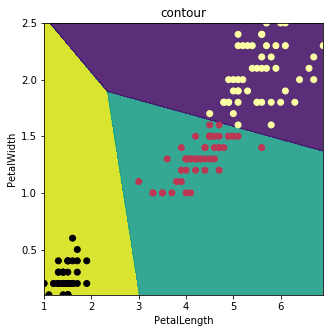

In [7]:
shikibetsumen(500, X)